## Packages

### Install

In [1]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install pyreadstat

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install -U scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [8]:
pip install boruta

Note: you may need to restart the kernel to use updated packages.


In [9]:
pip install -U imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [10]:
pip install -U statsmodels

Note: you may need to restart the kernel to use updated packages.


In [11]:
pip install Jinja2

Note: you may need to restart the kernel to use updated packages.


### Import

In [113]:
import numpy as np # for scientific computing
import pandas as pd # a fundamental and powerful package for data analysis and manipulation
import seaborn as sns # seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import pyreadstat # for reading .sav file
from sklearn.model_selection import KFold, ShuffleSplit, StratifiedKFold, StratifiedShuffleSplit, LeaveOneOut, train_test_split # for separating train and test data, scaling, model building, ...
from scipy import stats # it contains a large number of statistics, probability distributions functions
import matplotlib.pyplot as plt # matplotlib is a library to plot graphs in Python
from sklearn.impute import KNNImputer # Imputation for completing missing values using k-Nearest Neighbors
from sklearn.experimental import enable_iterative_imputer # Enables IterativeImputer. The API and results of this estimator might change without any deprecation cycle
from sklearn.impute import IterativeImputer # Multivariate imputer that estimates each feature from all the others. A strategy for imputing missing values by modeling each feature with missing values as a function of other features in a round-robin fashion
from sklearn.ensemble import RandomForestClassifier # A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting
from boruta import BorutaPy # Boruta is an all relevant feature selection method, while most other are minimal optimal; this means it tries to find all features carrying information usable for prediction, rather than finding a possibly compact subset of features on which some classifier has a minimal error
from imblearn.over_sampling import SMOTE # Implementation of SMOTE - Synthetic Minority Over-sampling Technique
from collections import Counter # A Counter is a container that keeps track of how many times equivalent values are added
from sklearn.metrics import plot_confusion_matrix # plot confusion matrix
from sklearn.metrics import accuracy_score # Accuracy classification score
from sklearn.model_selection import cross_val_score # Evaluate a score by cross-validation
from sklearn.metrics import classification_report # Build a text report showing the main classification metrics.
from sklearn import preprocessing # provides the StandardScaler utility class, which is a quick and easy way to perform operations
from sklearn.preprocessing import StandardScaler # To normalize the data for KNNImputer
from sklearn.manifold import TSNE # To visualize high dimensional data
from collections import Counter # To save the counted values as dict keys
from sklearn.decomposition import PCA #PCA Analysis
from sklearn.pipeline import Pipeline #Pipeline to connect scalers and classifiers
from matplotlib.pyplot import figure #Plot graph
from sklearn.metrics import roc_curve, roc_auc_score #Evaluate ROC curve



## 1. Read Data

In [13]:
# reading data as a data frame, setting ID as the index and getting the number of rows and columns
df = pd.DataFrame(pd.read_spss("../data/secom_mod.SAV"))
#df = pd.read_spss(r'C:\Users\s0576758\Desktop\HTW\Data Mining - Tilo\secom_mod.SAV')
df = df.set_index('ID')
df.shape

(1567, 592)

## 2. Explore data

#### 2.1. Shape and type

In [14]:
# shape of the data set
print('Shape: ',df.shape)  

Shape:  (1567, 592)


In [15]:
# checking data types of the features
print(df.info(),"\n")
print(df.dtypes)

<class 'pandas.core.frame.DataFrame'>
Float64Index: 1567 entries, 1.0 to 1567.0
Columns: 592 entries, class to feature590
dtypes: float64(591), object(1)
memory usage: 7.1+ MB
None 

class         float64
timestamp      object
feature001    float64
feature002    float64
feature003    float64
               ...   
feature586    float64
feature587    float64
feature588    float64
feature589    float64
feature590    float64
Length: 592, dtype: object


#### 2.2. Duplicates

In [16]:
# Check for duplicated rows
df.duplicated().any()

False

In [17]:
#Check for duplicated columns
#df.columns.duplicated().any()

listofName = list(df.columns)
print(listofName)
testID = df[[c for c in df if c not in listofName]]
#its runnig for the whole DF
testRows = df[df.duplicated()]
testRows.head()

['class', 'timestamp', 'feature001', 'feature002', 'feature003', 'feature004', 'feature005', 'feature006', 'feature007', 'feature008', 'feature009', 'feature010', 'feature011', 'feature012', 'feature013', 'feature014', 'feature015', 'feature016', 'feature017', 'feature018', 'feature019', 'feature020', 'feature021', 'feature022', 'feature023', 'feature024', 'feature025', 'feature026', 'feature027', 'feature028', 'feature029', 'feature030', 'feature031', 'feature032', 'feature033', 'feature034', 'feature035', 'feature036', 'feature037', 'feature038', 'feature039', 'feature040', 'feature041', 'feature042', 'feature043', 'feature044', 'feature045', 'feature046', 'feature047', 'feature048', 'feature049', 'feature050', 'feature051', 'feature052', 'feature053', 'feature054', 'feature055', 'feature056', 'feature057', 'feature058', 'feature059', 'feature060', 'feature061', 'feature062', 'feature063', 'feature064', 'feature065', 'feature066', 'feature067', 'feature068', 'feature069', 'feature070

,class,timestamp,feature001,feature002,feature003,feature004,feature005,feature006,feature007,feature008,...,feature581,feature582,feature583,feature584,feature585,feature586,feature587,feature588,feature589,feature590
ID,,,,,,,,,,,,,,,,,,,,,


In [18]:
####Test

#### 2.3. Pass / Fail ratio

In [19]:
# number of pass and fail values
df['class'].value_counts()

0.0    1472
1.0      95
Name: class, dtype: int64

In [20]:
# pie chart of the target variable
def ClassDistributionGraph(df, title):
    %matplotlib inline
    plt.rcParams.update({'figure.figsize':(5,5), 'figure.dpi':100})
    
    labels = ['Pass', 'Fail']
    distribution = df.value_counts()
    colors = ['lightblue', 'yellowgreen']

    # Plot
    plt.pie(distribution, labels=labels, colors=colors, autopct= lambda p: '{:.2f}%({:.0f})'.format(p,(p/100)*distribution.sum()), shadow=True, startangle=140,)
    plt.title(title, fontsize=15)
    plt.axis('equal')
    plt.show()

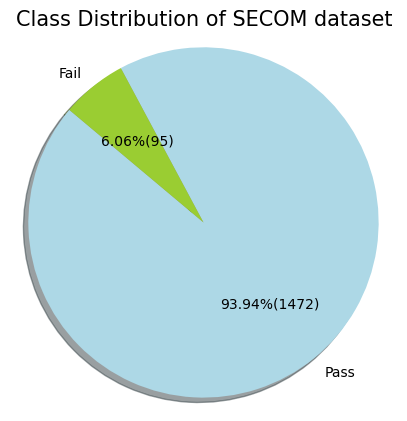

In [21]:
ClassDistributionGraph(df['class'], 'Class Distribution of SECOM dataset')

#### 2.4. Histogram of features

23 9 8 3


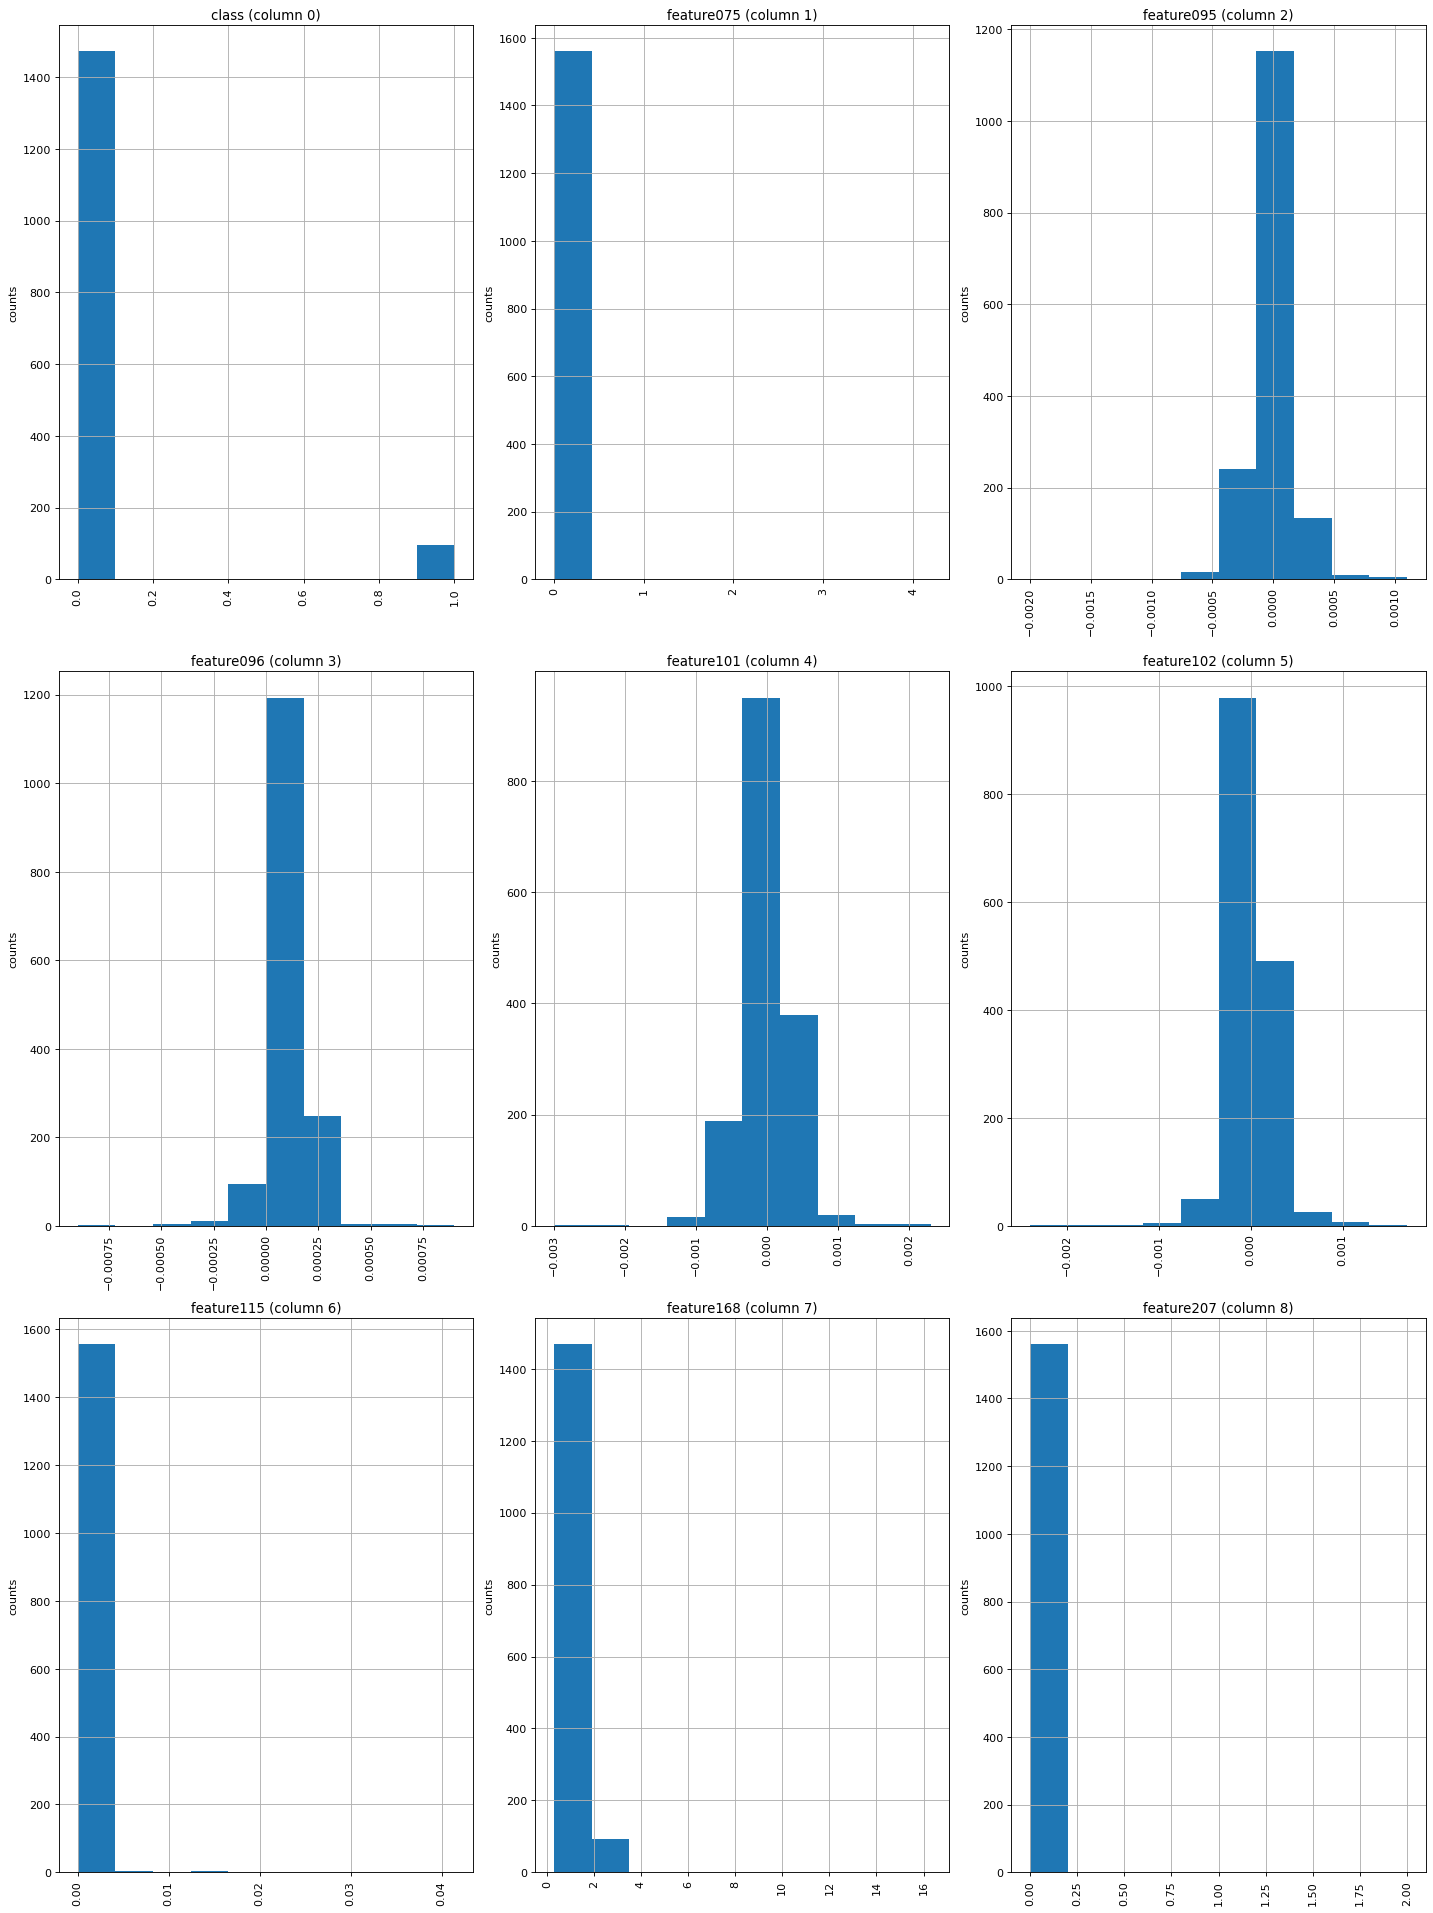

In [22]:
# histogram of some of the features
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    %matplotlib inline
    plt.rcParams.update({'figure.figsize':(8,8), 'figure.dpi':100})
 
    
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = int((nCol + nGraphPerRow - 1) / nGraphPerRow)
    %matplotlib inline
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
   
    print(nCol, nGraphShown, nGraphRow, nGraphPerRow)
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

plotPerColumnDistribution(df, 9, 3)

#### 2.5. Correlation

In [23]:
# Correlation Histogram

def correlation(df):
    cor_matrix = pd.DataFrame(df.corr())

    # Remove reuntant values by selecting only the upper correlation triangle
    upper_tri = pd.DataFrame(cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(bool)))

    # Convert the upper correlation triangle to a Series
    corlist = pd.Series(upper_tri.values.ravel('F'))

    # Correlation Histogram
    %matplotlib inline
    plt.rcParams.update({'figure.figsize':(8,8), 'figure.dpi':100})

    # Plot Histogram on x
    plt.hist(corlist, bins =50)
    plt.gca().set(title='Frequency Histogram of Correlation', ylabel='Frequency', xlabel='Correlation coefficient');

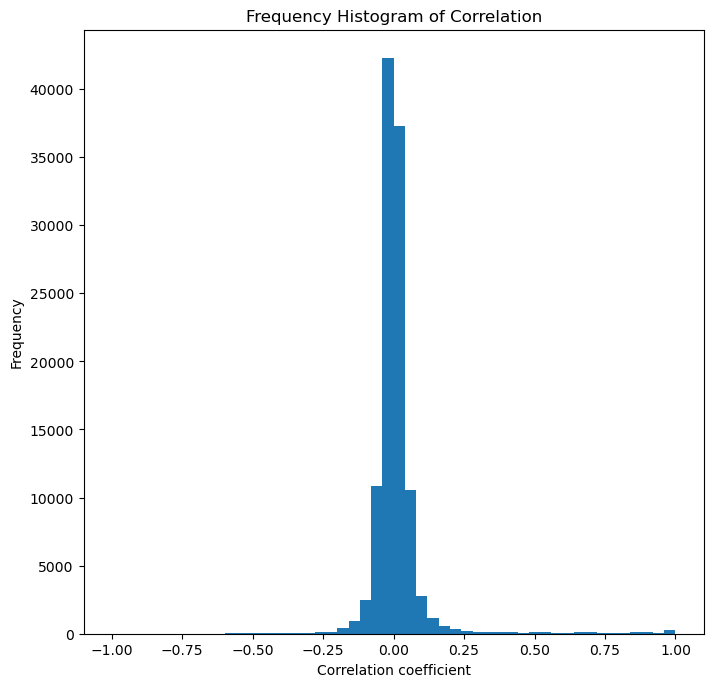

In [24]:
correlation(df)

#### 2.6. Missing values

In [25]:
# Total number of Nan values in the dataframe
df.isna().sum().sum()

41951

In [26]:
#number of cols with Nan values
nan_cols = [i for i in df.columns if df[i].isnull().any()]
print('number of columns with missing values = ', len(nan_cols))

#number of rows with Nan values
nan_rows = df.apply(lambda x: sum(x.isnull().values), axis = 1) # For rows
print('number of rows with missing values = ', len(nan_rows))

number of columns with missing values =  538
number of rows with missing values =  1567


## 3. Preprocessing

In [27]:
# Give text labels to the training examples
df['class'] = df['class'].replace({0: "PASS", 1: "FAIL"})
df.tail()

,class,timestamp,feature001,feature002,feature003,feature004,feature005,feature006,feature007,feature008,...,feature581,feature582,feature583,feature584,feature585,feature586,feature587,feature588,feature589,feature590
ID,,,,,,,,,,,,,,,,,,,,,
1563.0,PASS,16/10/2008 15:13:00,2899.41,2464.36,2179.7333,3085.3781,1.4843,100.0,82.2467,0.1248,...,0.0047,203.1720,0.4988,0.0143,0.0039,2.8669,0.0068,0.0138,0.0047,203.1720
1564.0,PASS,16/10/2008 20:49:00,3052.31,2522.55,2198.5667,1124.6595,0.8763,100.0,98.4689,0.1205,...,NaN,NaN,0.4975,0.0131,0.0036,2.6238,0.0068,0.0138,0.0047,203.1720
1565.0,PASS,17/10/2008 05:26:00,2978.81,2379.78,2206.3000,1110.4967,0.8236,100.0,99.4122,0.1208,...,0.0025,43.5231,0.4987,0.0153,0.0041,3.0590,0.0197,0.0086,0.0025,43.5231
1566.0,PASS,17/10/2008 06:01:00,2894.92,2532.01,2177.0333,1183.7287,1.5726,100.0,98.7978,0.1213,...,0.0075,93.4941,0.5004,0.0178,0.0038,3.5662,0.0262,0.0245,0.0075,93.4941
1567.0,PASS,17/10/2008 06:07:00,2944.92,2450.76,2195.4444,2914.1792,1.5978,100.0,85.1011,0.1235,...,0.0045,137.7844,0.4987,0.0181,0.0040,3.6275,0.0117,0.0162,0.0045,137.7844


## 4. Data Preparation

### 4.1.Splitting Traninig and Test Data

In [28]:
# Split df into X and y
y = df['class']
X = df.drop('class', axis=1)

In [29]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, shuffle=True, random_state=40, stratify=y)

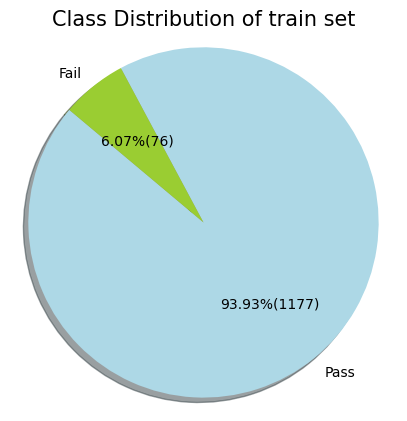

In [30]:
# pie chart for the train set
ClassDistributionGraph(y_train, 'Class Distribution of train set')

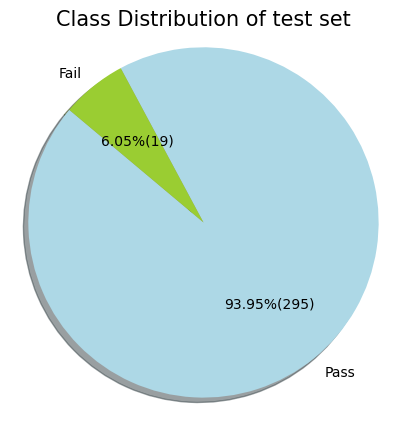

In [31]:
# pie chart for the test set
ClassDistributionGraph(y_test, 'Class Distribution of test set')

### 4.2 Rough feature reduction

#### 4.2.1 Removal of timestamp

In [32]:
# removing timestamp
X_train= X_train.drop(columns='timestamp')

#### 4.2.2 Removal of constants

In [33]:
#columns that have the same value excluding nan
print(len(X_train.columns[X_train.nunique() == 1]))

#column names with same value in it
X_train.columns[X_train.nunique() == 1]
print(list(X_train.columns[X_train.nunique() == 1]))

#remove these columns since it adds no value
single_value_columns = list(X_train.columns[X_train.nunique() == 1])
X_train=X_train.drop(columns=single_value_columns)
X_train

116
['feature006', 'feature014', 'feature043', 'feature050', 'feature053', 'feature070', 'feature098', 'feature142', 'feature150', 'feature179', 'feature180', 'feature187', 'feature190', 'feature191', 'feature192', 'feature193', 'feature194', 'feature195', 'feature227', 'feature230', 'feature231', 'feature232', 'feature233', 'feature234', 'feature235', 'feature236', 'feature237', 'feature238', 'feature241', 'feature242', 'feature243', 'feature244', 'feature257', 'feature258', 'feature259', 'feature260', 'feature261', 'feature262', 'feature263', 'feature264', 'feature265', 'feature266', 'feature267', 'feature277', 'feature285', 'feature314', 'feature315', 'feature316', 'feature323', 'feature326', 'feature327', 'feature328', 'feature329', 'feature330', 'feature331', 'feature365', 'feature370', 'feature371', 'feature372', 'feature373', 'feature374', 'feature375', 'feature376', 'feature379', 'feature380', 'feature381', 'feature382', 'feature395', 'feature396', 'feature397', 'feature398', '

,feature001,feature002,feature003,feature004,feature005,feature007,feature008,feature009,feature010,feature011,...,feature581,feature582,feature583,feature584,feature585,feature586,feature587,feature588,feature589,feature590
ID,,,,,,,,,,,,,,,,,,,,,
567.0,3023.07,2484.55,2242.8555,1430.7270,0.8832,106.2100,0.1216,1.5613,-0.0028,0.0008,...,NaN,NaN,0.4979,0.0165,0.0041,3.3098,0.0184,0.0127,0.0037,68.7057
1261.0,2953.63,2384.04,2191.2111,1437.5003,2.2073,97.6444,0.1235,1.3584,-0.0024,-0.0048,...,NaN,NaN,0.4968,0.0188,0.0041,3.7853,0.0137,0.0326,0.0108,237.4625
1041.0,3021.61,2440.29,2227.2222,2043.5876,1.1892,95.5267,0.1253,1.5335,-0.0083,-0.0095,...,NaN,NaN,0.5091,0.0123,0.0031,2.4116,0.0437,0.0200,0.0074,45.7019
1181.0,3093.46,2479.17,2221.3667,2490.6947,1.2667,88.6578,0.1220,1.3537,0.0134,-0.0039,...,NaN,NaN,0.5006,0.0148,0.0036,2.9659,0.0190,0.0150,0.0045,78.6525
611.0,3010.40,NaN,2172.4000,1148.4101,1.2614,102.4522,0.1227,1.3843,-0.0010,-0.0004,...,NaN,NaN,0.5015,0.0137,0.0034,2.7339,0.0252,0.0157,0.0046,62.3881
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
806.0,2952.31,2453.53,2188.7222,1325.5230,1.1721,105.1700,0.1250,1.4480,-0.0233,0.0087,...,NaN,NaN,0.4949,0.0155,0.0034,3.1238,0.0253,0.0058,0.0018,22.7661
1101.0,2880.58,2489.76,2256.6000,2365.4787,1.1384,85.4278,0.1205,1.6114,0.0484,0.0043,...,0.0076,50.7949,0.5032,0.0117,0.0029,2.3282,0.0398,0.0202,0.0076,50.7949
1469.0,2968.78,2451.53,2207.1000,1298.4309,1.0251,96.9478,0.1203,1.3985,-0.0105,-0.0140,...,0.0084,185.3578,0.4972,0.0133,0.0036,2.6718,0.0167,0.0310,0.0084,185.3578


#### 4.2.3. Checking for columns more than 55% nan values

In [34]:
# count the number of missing values for each column
num_missing = pd.DataFrame((X_train.isna()).sum())
print(num_missing.sort_values(0))

               0
feature360     0
feature223     0
feature224     0
feature249     0
feature250     0
...          ...
feature359  1078
feature294  1140
feature158  1140
feature159  1140
feature293  1140

[474 rows x 1 columns]


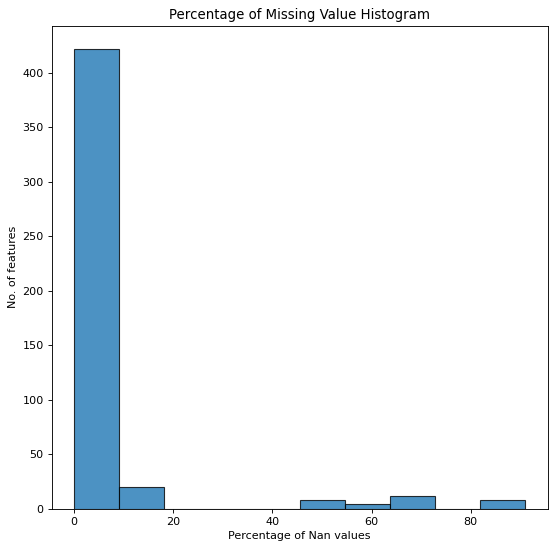

In [35]:
# Missing Value histogram
nan_perc = pd.DataFrame(round((X_train.isnull().sum() * 100/ len(X_train)),2))
nan_perc = nan_perc.reset_index()
nan_perc = nan_perc.rename({'index': 'feature', 0: 'percentage'}, axis=1)

%matplotlib inline
plt.rcParams.update({'figure.figsize':(8,8), 'figure.dpi':80})
n,bins,patch = plt.hist(nan_perc['percentage'],bins=10, alpha=0.8, label='Value', edgecolor='black', linewidth=1)
plt.gca().set(title='Percentage of Missing Value Histogram', ylabel='No. of features', xlabel='Percentage of Nan values')
plt.show()

In [36]:
# Defining a threshold to remove the values above it
threshold= 0.55
pct_null = X_train.isnull().sum() / len(X_train)
missing_value_cols = pct_null[pct_null >= threshold].index

# number of features containing more than 55% missing values
print(len(missing_value_cols))
print(missing_value_cols)

X_train = X_train.drop(missing_value_cols, axis=1)

24
Index(['feature086', 'feature110', 'feature111', 'feature112', 'feature158',
       'feature159', 'feature221', 'feature245', 'feature246', 'feature247',
       'feature293', 'feature294', 'feature359', 'feature383', 'feature384',
       'feature385', 'feature493', 'feature517', 'feature518', 'feature519',
       'feature579', 'feature580', 'feature581', 'feature582'],
      dtype='object')


#### 4.2.5. Less volatile

In [37]:
# Exploring  remaining features
summary = X_train.iloc[:,:].describe(include='all')

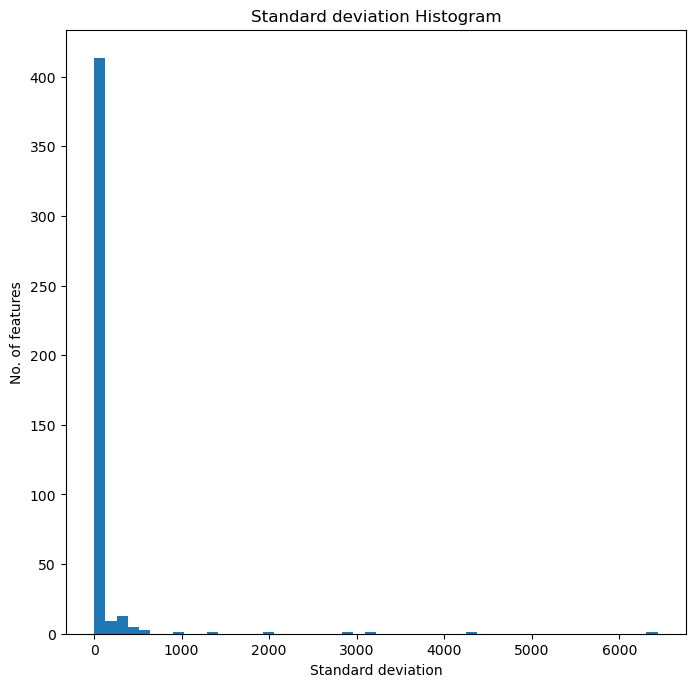

In [38]:
# Checking std of remaining features

def StandardDeviation(df):
    import matplotlib.pyplot as plt

    %matplotlib inline
    plt.rcParams.update({'figure.figsize':(8,8), 'figure.dpi':100})

    plt.hist(df.std(), bins = 50)
    plt.gca().set(title='Standard deviation Histogram', ylabel='No. of features', xlabel='Standard deviation');
    plt.show()
    
StandardDeviation(X_train)

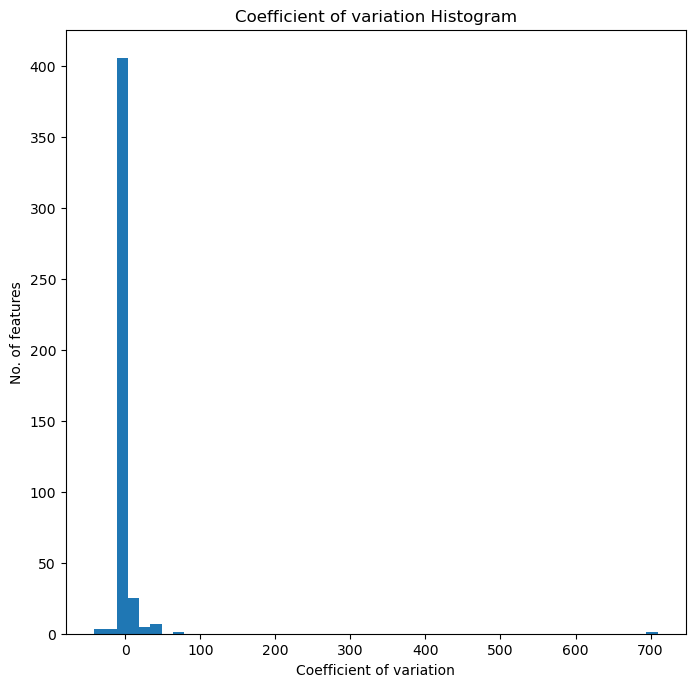

In [39]:
# Checking coeff std of remaining features
def CoefficientOfVariation(df):
    %matplotlib inline
    plt.rcParams.update({'figure.figsize':(8,8), 'figure.dpi':100})

    plt.hist(df.std()/df.mean(), bins = 50)
    plt.gca().set(title='Coefficient of variation Histogram', ylabel='No. of features', xlabel='Coefficient of variation');
    plt.show()

CoefficientOfVariation(X_train)

<AxesSubplot:>

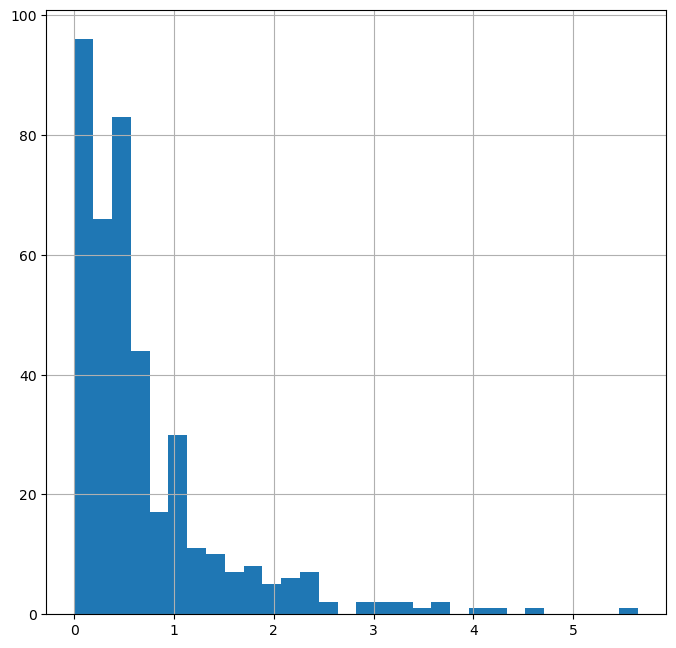

In [40]:
# histogram of the coefficient standard deviation of a percentage of features with the least coeffstd
feature_coeffstd = pd.DataFrame(summary.loc['std',:]/abs(summary.loc['mean',:])).sort_values(by=[0])
percentage_features = int(len(feature_coeffstd)*90/100)
feature_coeffstd.iloc[0:percentage_features,0].hist(bins=30)

In [41]:
# a percentage of features with the least coeffstd to remove
percentageToAnalyze = 5

percentage_features_rm = int(len(feature_coeffstd)*percentageToAnalyze/100)
feature_index = feature_coeffstd.index
features_least_volatile = feature_index[0:percentage_features_rm+1]
print("Number of least Volatiles", len(features_least_volatile))
print(features_least_volatile)

Number of least Volatiles 23
Index(['feature132', 'feature058', 'feature038', 'feature039', 'feature122',
       'feature134', 'feature583', 'feature124', 'feature125', 'feature057',
       'feature120', 'feature056', 'feature117', 'feature054', 'feature021',
       'feature055', 'feature088', 'feature548', 'feature114', 'feature003',
       'feature018', 'feature012', 'feature119'],
      dtype='object')


In [42]:
# dropping a percentage of features with the least coeffstd
X_train.drop(features_least_volatile, axis = 1, inplace = True)

In [43]:
X_train

,feature001,feature002,feature004,feature005,feature007,feature008,feature009,feature010,feature011,feature013,...,feature576,feature577,feature578,feature584,feature585,feature586,feature587,feature588,feature589,feature590
ID,,,,,,,,,,,,,,,,,,,,,
567.0,3023.07,2484.55,1430.7270,0.8832,106.2100,0.1216,1.5613,-0.0028,0.0008,197.4289,...,0.1153,1.1395,17.5289,0.0165,0.0041,3.3098,0.0184,0.0127,0.0037,68.7057
1261.0,2953.63,2384.04,1437.5003,2.2073,97.6444,0.1235,1.3584,-0.0024,-0.0048,199.4944,...,0.2767,86.7573,91.1106,0.0188,0.0041,3.7853,0.0137,0.0326,0.0108,237.4625
1041.0,3021.61,2440.29,2043.5876,1.1892,95.5267,0.1253,1.5335,-0.0083,-0.0095,198.3405,...,0.1100,1.5180,16.7005,0.0123,0.0031,2.4116,0.0437,0.0200,0.0074,45.7019
1181.0,3093.46,2479.17,2490.6947,1.2667,88.6578,0.1220,1.3537,0.0134,-0.0039,199.2506,...,0.0940,1.4926,14.3055,0.0148,0.0036,2.9659,0.0190,0.0150,0.0045,78.6525
611.0,3010.40,NaN,1148.4101,1.2614,102.4522,0.1227,1.3843,-0.0010,-0.0004,198.2033,...,0.1288,1.6264,23.2761,0.0137,0.0034,2.7339,0.0252,0.0157,0.0046,62.3881
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
806.0,2952.31,2453.53,1325.5230,1.1721,105.1700,0.1250,1.4480,-0.0233,0.0087,203.7087,...,0.1306,1.7048,16.6976,0.0155,0.0034,3.1238,0.0253,0.0058,0.0018,22.7661
1101.0,2880.58,2489.76,2365.4787,1.1384,85.4278,0.1205,1.6114,0.0484,0.0043,198.1248,...,0.0868,1.6892,14.6674,0.0117,0.0029,2.3282,0.0398,0.0202,0.0076,50.7949
1469.0,2968.78,2451.53,1298.4309,1.0251,96.9478,0.1203,1.3985,-0.0105,-0.0140,196.8639,...,0.1441,1.3708,18.3819,0.0133,0.0036,2.6718,0.0167,0.0310,0.0084,185.3578


### 4.3 Outlier Identification

In [44]:
# Funtion for Outlier treatment
def Outlier(X, outlier_treatment) :
    
    if outlier_treatment == 'NaN' :
        # calculating the z score of the values
        z_train= pd.DataFrame(stats.zscore(X,nan_policy='omit'))
        z_train

        # calculating the number of outliers
        print('Number of Outliers : ',sum(z_train.apply(lambda x: sum(x.apply(lambda x: 1 if abs(x)>3 else 0)))))

        #Outlier treatment : replacing outliers with NA to impute all NA values
        is_outlier = abs(z_train)>3
        is_outlier.columns = X.columns
        is_outlier.index = X.index
        return(X.mask(is_outlier, np.nan))
    
    elif outlier_treatment == '3s':
        boundary = 3
        scaler = preprocessing.StandardScaler()
        X = pd.DataFrame(scaler.fit_transform(X), columns= X.columns)
        X = X.apply(lambda x : [y if y < boundary or np.isnan(y) else boundary for y in x])
        X = X.apply(lambda x : [y if y > -1*boundary or np.isnan(y) else -1*boundary for y in x])
        
        # for inverse transformation
        X_inverse = pd.DataFrame(scaler.inverse_transform(X))
        X_inverse.columns = X.columns
        return(X_inverse)




In [45]:
# Outlier treatment with NA values
X_train = Outlier(X_train, 'NaN')

Number of Outliers :  4724


In [ ]:
#X_train = Outlier(X_train, '3s')

### 4.4 Missing value Imputation

In [46]:
# function for imputing missing values
def MissingValueImputation(X, Imputer) :
    
    if Imputer == 'KNN' :
        
        #Scaling
        scaler = preprocessing.StandardScaler()
        X = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)
        
        #define imputer
        KNN_imputer = KNNImputer(n_neighbors=10, weights = 'uniform')

        #fit on the dataset
        X = KNN_imputer.fit_transform(X)
        
        #Inverse tranform of scaling
        X_inverse = pd.DataFrame(scaler.inverse_transform(X))
        return(X_inverse)
        
    elif Imputer == 'MICE' :
        
        #define imputer
        MICE_imputer = IterativeImputer(max_iter=20, sample_posterior=True, random_state=0)
        
        #fit dataset
        return(MICE_imputer.fit_transform(X))

#### 4.4.1. KNN

In [47]:
# impute using knn
X_train_KNN = X_train.copy(deep=True)
X_train_KNN.iloc[:,:] = pd.DataFrame(MissingValueImputation(X_train,'KNN'))

In [48]:
X_train_KNN.isna().sum().sum()

0

#### 4.4.2. MICE

In [49]:
# impute using mice
X_train_MICE = X_train.copy(deep=True)
X_train_MICE.iloc[:,:] = pd.DataFrame(MissingValueImputation(X_train,'MICE'))

In [50]:
X_train_MICE.isna().sum().sum()

0

### 4.5. Evaluation of imputation

#### 4.5.1 Density plots

Text(0.5, 0, 'feature347')

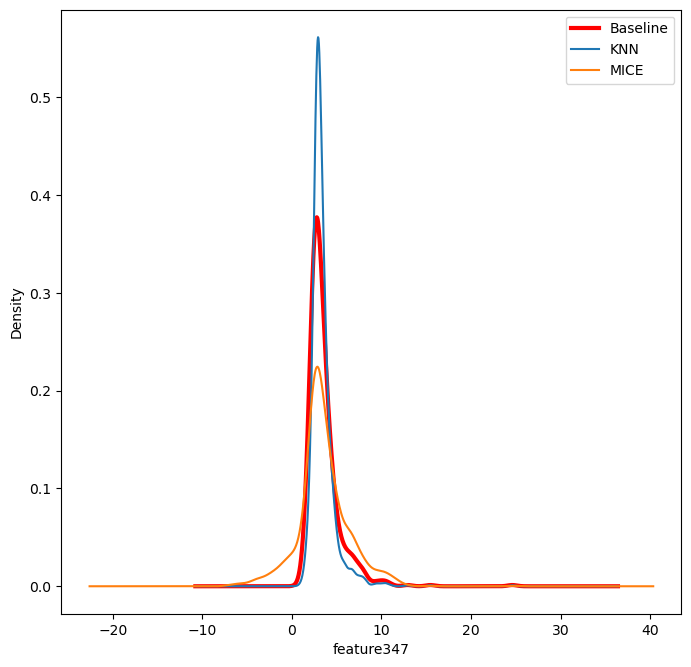

In [55]:
# Visualization of a variable with most missing values

X_train['feature347'].plot(kind='kde',c='red',linewidth=3)
X_train_KNN['feature347'].plot(kind='kde')
X_train_MICE['feature347'].plot(kind='kde')
labels = ['Baseline', 'KNN','MICE']
plt.legend(labels)
plt.xlabel('feature347')

60


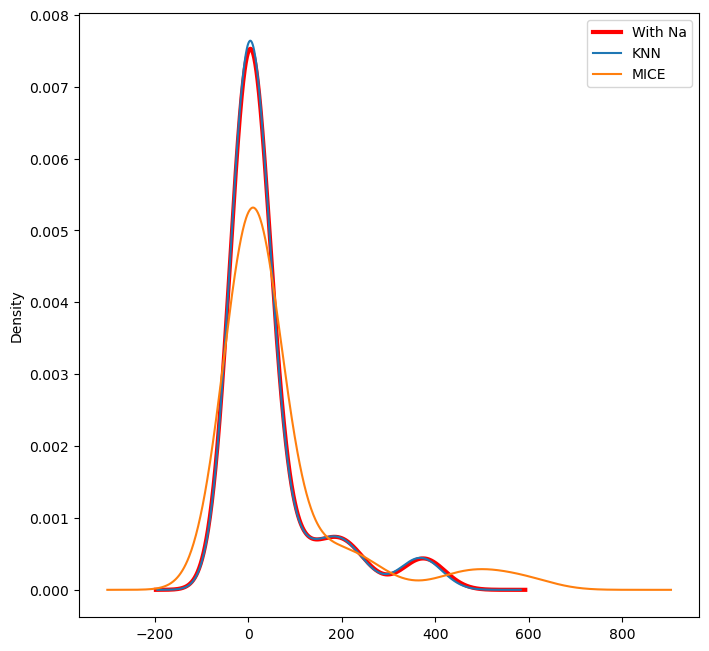

In [56]:
# plot the std of the features with more than 3% of missing values before and after imputation with knn and mice
feature_missing_sum = pd.DataFrame((X_train.isna()).sum())
percentage_missing_filter = 3/100
feature_filter = feature_missing_sum[feature_missing_sum[0]>=(len(X_train.loc[:,])*percentage_missing_filter)].index

print(len(feature_filter))

summary_with_na = X_train[feature_filter].describe(include='all')
feature_std_with_na = pd.DataFrame(summary_with_na.loc['std',:])
feature_std_sort_with_na = feature_std_with_na.sort_values(by=['std'])

summary_knn = X_train_KNN[feature_filter].describe(include='all')
feature_std_knn = pd.DataFrame(summary_knn.loc['std',:])
feature_std_sort_knn = feature_std_knn.sort_values(by=['std'])

summary_mice = X_train_MICE[feature_filter].describe(include='all')
feature_std_mice = pd.DataFrame(summary_mice.loc['std',:])
feature_std_sort_mice = feature_std_mice.sort_values(by=['std'])

feature_std_sort_with_na.iloc[:,0].plot(kind='kde',c='red',linewidth=3)
feature_std_sort_knn.iloc[:,0].plot(kind='kde')
feature_std_sort_mice.iloc[:,0].plot(kind='kde')
labels = ['With Na', 'KNN','MICE']
plt.legend(labels)

### Visualizing using t-SNE

In [57]:
# Visualizing high dimensional data using TSNE 

m = TSNE(learning_rate=50)
y_lm = y_train.replace({"PASS": 0, "FAIL" :1})
X_tsne = X_train_MICE.merge(y_lm, left_index= True, right_index= True)
tsne_features = m.fit_transform(X_tsne)
tsne_features = pd.DataFrame(tsne_features, columns=['x','y'])
tsne_features

,x,y
0,-4.739239,-14.195119
1,4.534939,1.509575
2,45.312351,6.113780
3,-25.937260,15.604435
4,-6.158567,29.109505
...,...,...
1248,-9.753274,21.323772
1249,20.518993,17.018257
1250,-29.676147,26.401794
1251,-32.551632,-23.335154


<AxesSubplot:xlabel='x', ylabel='y'>

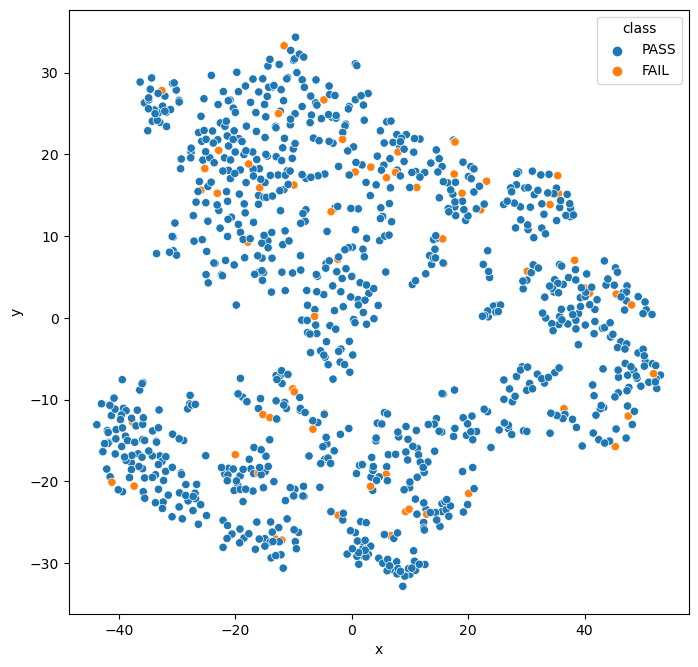

In [58]:
X_tsne['class'] = X_tsne['class'].replace({0: "PASS", 1: "FAIL"})
sns.scatterplot(data = tsne_features , x='x' , y='y', hue= X_tsne['class'], legend= True )


## 4.6. Feature Selection

### 4.6.1 PCA

In [59]:
pipe = Pipeline([ ('scaler', StandardScaler()), ('reducer', PCA(n_components= 0.8))])

X_train_PCA = pipe.fit_transform(X_train_MICE, y_train)
# Fit the pipe to the data
print("By using PCA we have {} components".format(X_train_PCA.shape[1]))

print(pipe.steps[1][1].explained_variance_ratio_.cumsum())

By using PCA we have 117 components
[0.03594031 0.06389375 0.08865875 0.10828335 0.12732695 0.14557857
 0.16131975 0.17628212 0.19078085 0.20434901 0.21735352 0.22949467
 0.24144725 0.25325323 0.26476258 0.27573316 0.28626655 0.29626805
 0.30592464 0.31551382 0.32490689 0.33400797 0.34307053 0.35188375
 0.36041873 0.36890735 0.37723003 0.38546178 0.39364536 0.40168417
 0.40948547 0.41718041 0.42482433 0.4323819  0.43990665 0.4473306
 0.45461745 0.46177073 0.46888257 0.47579117 0.48260712 0.48931998
 0.49591105 0.50249757 0.50904535 0.51540313 0.52171553 0.52792905
 0.53402362 0.54006905 0.54606634 0.55191626 0.55773152 0.56348049
 0.5691394  0.57470798 0.58011787 0.58542777 0.59073065 0.59597815
 0.60114985 0.60626057 0.61127641 0.61618239 0.62102928 0.62575384
 0.6303811  0.6349268  0.63938052 0.64379567 0.64818855 0.65253802
 0.65686013 0.66113569 0.66529073 0.66941269 0.67344671 0.67744709
 0.68142251 0.68537301 0.68920284 0.69302676 0.69679097 0.70049753
 0.70420123 0.70786673 0.71

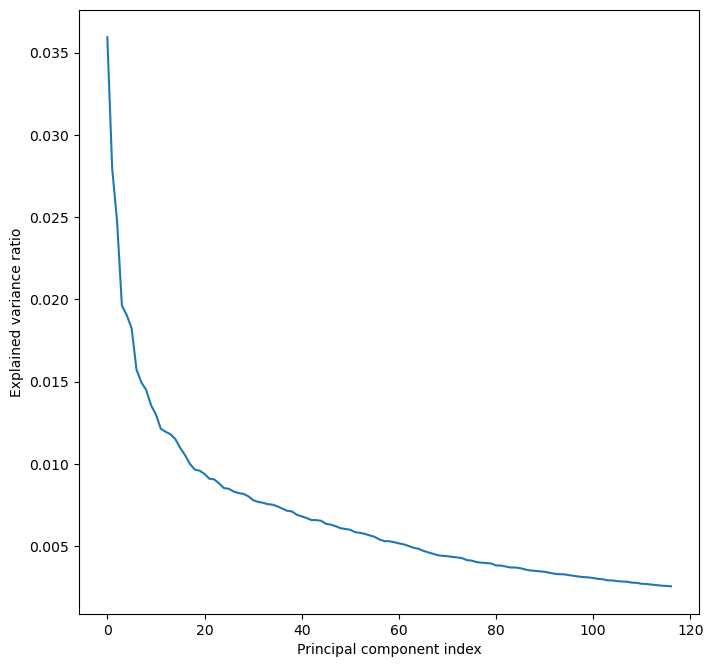

In [60]:
#Check the elbow point where is the optimal number of components

var = pipe.steps[1][1].explained_variance_ratio_

figure(figsize=(8, 8), dpi=100)
plt.plot(var)
plt.xlabel('Principal component index')
plt.ylabel('Explained variance ratio')
plt.show()

### 4.6.2 Boruta

In [61]:
#Boruta function

def BorutaFeatureSelection (X, y) :
    feature_names = np.array(X.columns)

    # define random forest classifier
    model = RandomForestClassifier(n_jobs=-1, class_weight='balanced', max_depth=5)
    model.fit(X, y)
    
    # define Boruta feature selection method
    feature_selector = BorutaPy(model, n_estimators='auto', verbose=2, random_state=1)

    # find all relevant features
    feature_selector.fit(X.to_numpy(),y)

    # check selected features
    feature_selector.support_

    # check ranking of features
    feature_selector.ranking_

    # zip feature names, ranks, and decisions 
    feature_ranks = list(zip(feature_names, 
                             feature_selector.ranking_, 
                             feature_selector.support_))

    # print the results
    for feat in feature_ranks:
        print('Feature: {:<30} Rank: {},  Keep: {}'.format(feat[0], feat[1], feat[2]))
        
    final_features = list()
    indexes = np.where(feature_selector.support_ == True)
    for x in np.nditer(indexes):
        final_features.append(feature_names[x])
    print(final_features)
    
    
    # call transform() on X to filter it down to selected features
    return pd.DataFrame(X.filter(final_features)) , final_features


In [62]:
# apply Boruta and store selected features in the variable
X_train , final_features = BorutaFeatureSelection(X_train_MICE,y_train)

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	427
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	427
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	427
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	427
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	427
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	427
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	427
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	0
Tentative: 	20
Rejected: 	407
Iteration: 	9 / 100
Confirmed: 	3
Tentative: 	17
Rejected: 	407
Iteration: 	10 / 100
Confirmed: 	3
Tentative: 	17
Rejected: 	407
Iteration: 	11 / 100
Confirmed: 	3
Tentative: 	17
Rejected: 	407
Iteration: 	12 / 100
Confirmed: 	4
Tentative: 	16
Rejected: 	407
Iteration: 	13 / 100
Confirmed: 	4
Tentative: 	15
Rejected: 	408
Iteration: 	14 / 100
Confirmed: 	4
Tentative: 	15
Rejected: 	408
Iteration: 	15 / 100
Confirmed: 	4
Tentative: 	15
Rejected: 	408
Iteration: 	16 / 100
Confirmed: 	6
Tentat

### 4.6.2 Overview of remaining features


In [63]:
# Descriptive statistics
X_train.describe()

,feature034,feature060,feature065,feature066,feature104,feature113,feature126,feature127,feature131,feature461
count,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000
mean,8.823510,2.786285,20.532606,26.977787,-0.009899,0.460792,1.177018,2.722098,0.746243,29.131898
std,0.408141,8.409599,5.622140,8.094360,0.003290,0.041858,0.285691,0.391416,0.084987,12.685833
min,7.393245,-38.915849,-21.025663,-36.530909,-0.045648,0.265639,-0.451938,-1.784581,0.173077,7.953400
25%,8.577900,-1.948200,17.300900,22.991400,-0.011800,0.454300,0.974400,2.564000,0.688700,20.363900
50%,8.769600,0.860000,20.007300,26.254000,-0.010100,0.462600,1.135000,2.734000,0.759100,26.295600
75%,9.040200,4.415500,22.855500,30.013000,-0.008100,0.470100,1.338000,2.864000,0.820100,35.720100
max,10.963400,45.103290,70.412880,182.658946,0.002488,0.643415,3.006898,6.974917,0.999803,117.422837


In [64]:
#datatype and shape
print(X_train.info())
print(X_train.shape)

<class 'pandas.core.frame.DataFrame'>
Float64Index: 1253 entries, 567.0 to 645.0
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   feature034  1253 non-null   float64
 1   feature060  1253 non-null   float64
 2   feature065  1253 non-null   float64
 3   feature066  1253 non-null   float64
 4   feature104  1253 non-null   float64
 5   feature113  1253 non-null   float64
 6   feature126  1253 non-null   float64
 7   feature127  1253 non-null   float64
 8   feature131  1253 non-null   float64
 9   feature461  1253 non-null   float64
dtypes: float64(10)
memory usage: 140.0 KB
None
(1253, 10)


array([[<AxesSubplot:title={'center':'feature034'}>,
        <AxesSubplot:title={'center':'feature060'}>,
        <AxesSubplot:title={'center':'feature065'}>],
       [<AxesSubplot:title={'center':'feature066'}>,
        <AxesSubplot:title={'center':'feature104'}>,
        <AxesSubplot:title={'center':'feature113'}>],
       [<AxesSubplot:title={'center':'feature126'}>,
        <AxesSubplot:title={'center':'feature127'}>,
        <AxesSubplot:title={'center':'feature131'}>],
       [<AxesSubplot:title={'center':'feature461'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

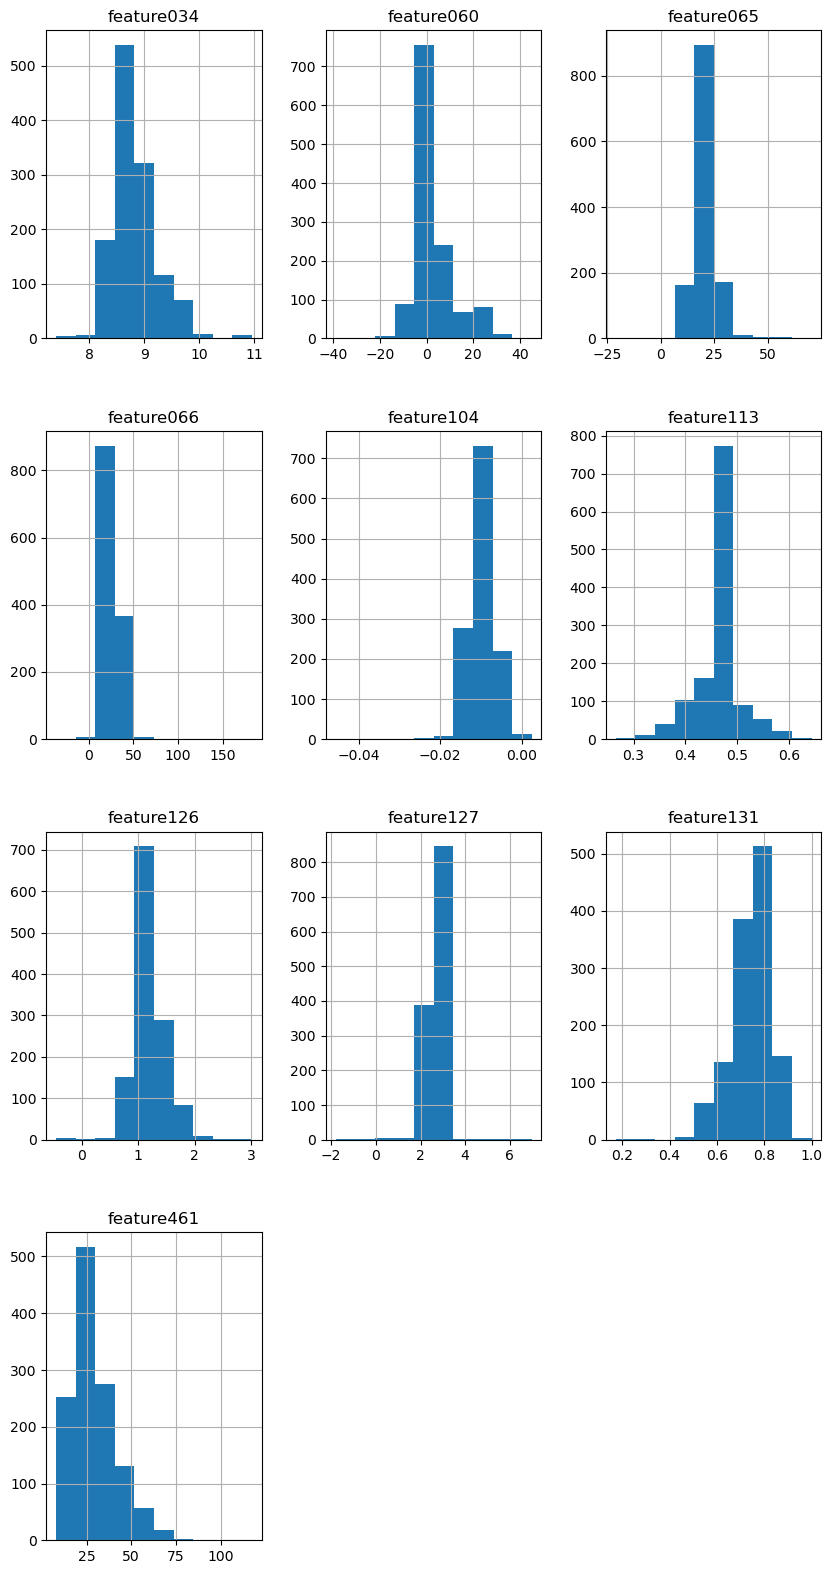

In [65]:
# Histogram of the features
X_train.hist(figsize=(10,20))

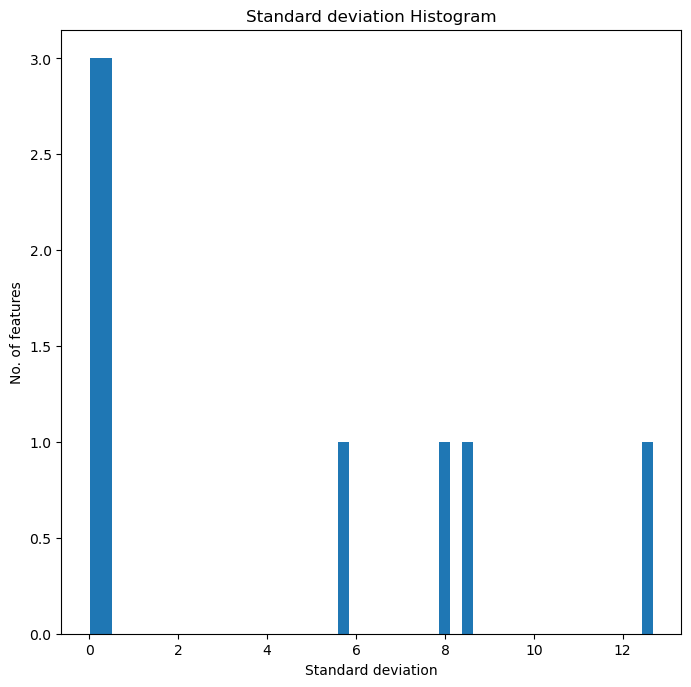

In [66]:
# Histogram of Standard Deviation of the remaining features
StandardDeviation(X_train)

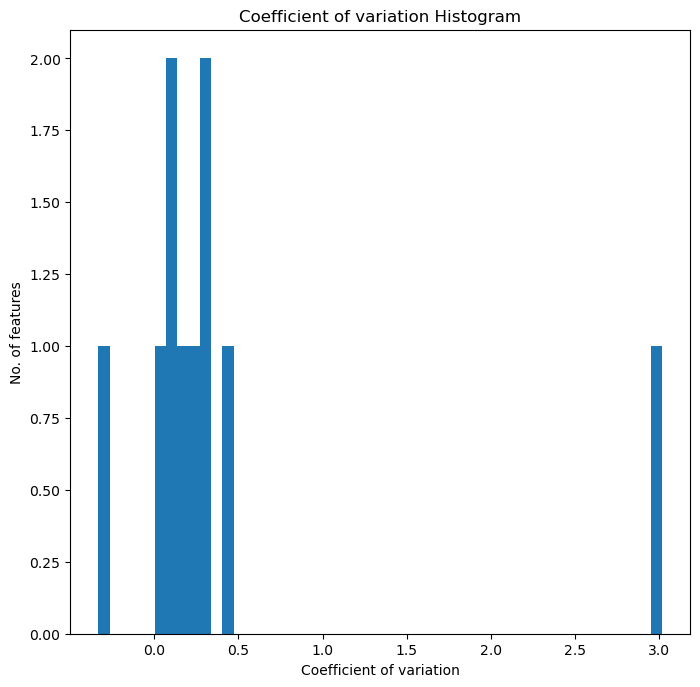

In [67]:
# Histogram of Coefficient of Standard Deviation of the remaining features
CoefficientOfVariation(X_train)

In [68]:
# Correlation of the remaining features

# Heatmap of correlation
corr = pd.DataFrame(X_train.corr())
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,feature034,feature060,feature065,feature066,feature104,feature113,feature126,feature127,feature131,feature461
feature034,1.00,0.15,0.06,0.07,0.12,0.02,-0.10,-0.00,0.03,0.06
feature060,0.15,1.00,-0.37,-0.31,0.30,0.03,-0.14,0.02,0.05,0.07
feature065,0.06,-0.37,1.00,0.72,0.09,0.00,-0.01,-0.02,0.02,0.05
feature066,0.07,-0.31,0.72,1.00,0.10,0.08,-0.02,-0.03,0.01,0.01
feature104,0.12,0.30,0.09,0.10,1.00,0.04,-0.22,-0.02,0.03,0.03
feature113,0.02,0.03,0.00,0.08,0.04,1.00,-0.01,-0.00,0.02,0.06
feature126,-0.10,-0.14,-0.01,-0.02,-0.22,-0.01,1.00,-0.23,-0.51,0.08
feature127,-0.00,0.02,-0.02,-0.03,-0.02,-0.00,-0.23,1.00,0.33,-0.12
feature131,0.03,0.05,0.02,0.01,0.03,0.02,-0.51,0.33,1.00,-0.09
feature461,0.06,0.07,0.05,0.01,0.03,0.06,0.08,-0.12,-0.09,1.00


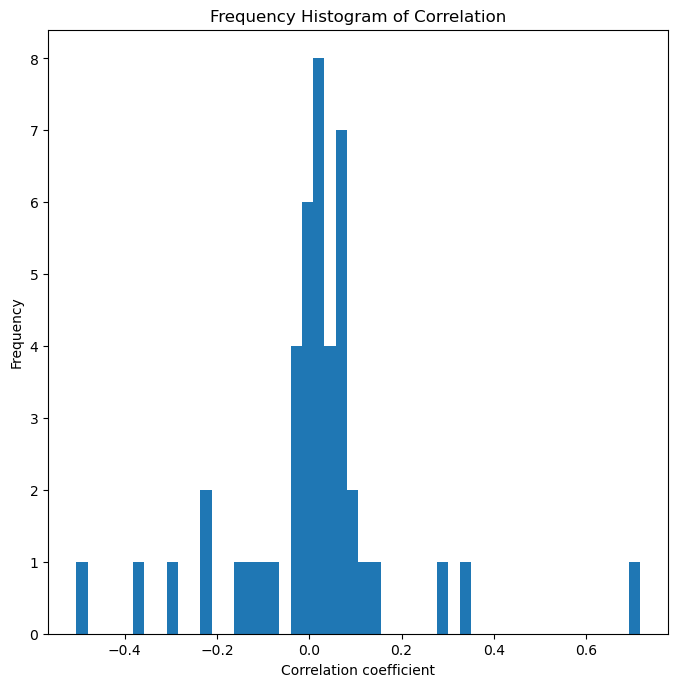

In [69]:
# Histogram of the Correlation of the remaining features
correlation(X_train)

## 5. Modeling

### 5.1. Balancing

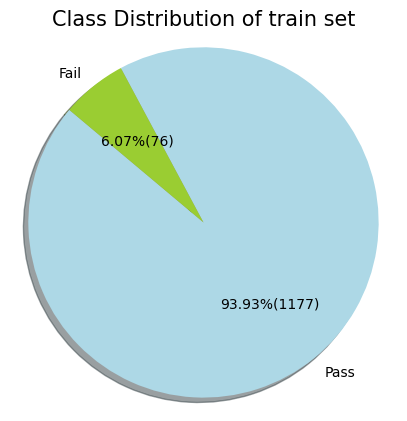

In [70]:
#Pie chart of the imbalanced train data
ClassDistributionGraph(y_train, 'Class Distribution of train set')

In [71]:
# Sampling using SMOTE
oversample = SMOTE()
X_train, y_train = oversample.fit_resample(X_train, y_train)

In [72]:
# summarize the new class distribution
counter = Counter(y_train)
print(counter)

Counter({'PASS': 1177, 'FAIL': 1177})


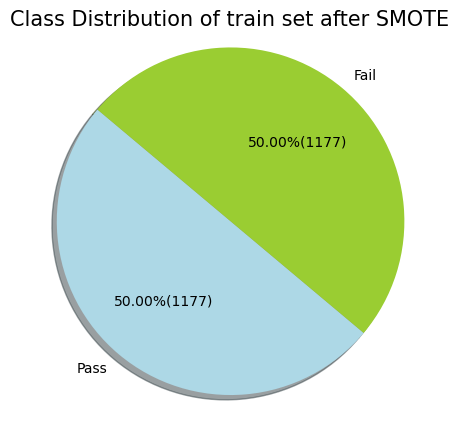

In [73]:
# Pie Chart to visualize balanced data
ClassDistributionGraph(y_train, 'Class Distribution of train set after SMOTE')

### 5.2 Preparing Test data

In [74]:
## Rough feature reduction

X_test = X_test.drop(columns= 'timestamp')
X_test = X_test.drop(columns= single_value_columns)
X_test = X_test.drop(columns= missing_value_cols)
X_test = X_test.drop(columns= features_least_volatile)
                    
# Outlier treatment 
X_test = Outlier(X_test,'NaN')

## Missing Value imputation
X_test.iloc[:,:] = pd.DataFrame(MissingValueImputation(X_test,'MICE',))

## Feature selection 
X_test = X_test.filter(final_features)

# View processed test set
X_test



Number of Outliers :  1399


,feature034,feature060,feature065,feature066,feature104,feature113,feature126,feature127,feature131,feature461
ID,,,,,,,,,,
766.0,8.7073,-0.2418,20.2418,24.7587,-0.0099,0.464100,1.0590,2.915,0.7697,18.7707
1231.0,8.8355,4.6891,15.3109,14.6060,-0.0088,0.523029,1.1350,2.545,0.7284,53.9906
723.0,8.3436,1.7618,18.2382,23.5304,-0.0101,0.456400,0.9554,2.864,0.7585,10.7413
1470.0,9.7137,0.0064,19.9936,23.1671,-0.0126,0.436667,1.2200,2.897,0.8522,37.5476
401.0,8.6013,4.5027,15.4973,22.3374,-0.0057,0.455800,1.3470,2.481,0.6834,17.4238
...,...,...,...,...,...,...,...,...,...,...
28.0,8.9336,17.3873,22.6127,27.4102,-0.0078,0.476000,0.9554,3.002,0.6287,30.4356
584.0,8.7994,11.2909,8.7091,13.8957,-0.0111,0.459100,1.1350,2.467,0.6802,14.2373
953.0,8.6695,0.4200,19.5800,26.5186,-0.0087,0.459000,1.1820,2.735,0.8349,29.9729


### 5.4 Model Evaluation


In [134]:
# fucntion to build , predit and assess the model
def run_ML_process(X, y, X_test, y_test, clf):
    #scaling
    #scaler = StandardScaler()
    #scaler.fit(X)
    #X = pd.DataFrame(scaler.transform(X), index=X.index, columns=X.columns)
    #X_test = pd.DataFrame(scaler.transform(X_test), index=X_test.index, columns=X_test.columns)
    
    #Evaluation using Startified K Fold cross validation
    cv = StratifiedKFold(n_splits=10)
    scores = cross_val_score(clf, X, y, cv=cv, scoring = 'accuracy')
    print('Averace Accuracy:', scores.mean())

    #fit
    clf.fit(X, y)
    
    #predict
    y_pred_test = clf.predict(X_test)
    
    # View accuracy score
    print('Accuracy: ', accuracy_score(y_test, y_pred_test))
    
    #Plot confussion matrix
    plt.rcParams.update({'font.size': 16})
    fig, ax = plt.subplots(figsize=(8, 8))
    plot_confusion_matrix(clf, X_test, y_test, ax=ax, cmap=plt.cm.Blues)
    
    # View the classification report for test data and predictions
    print(classification_report(y_test, y_pred_test))
    
    
    #ROC curve
    
    #Prediction probabilities
    clf_probs = clf.predict_proba(X_test)
    
    #Probabilities of the positive outcome is kept
    clf_probs = clf_probs[:, 1]

    
    #Area under ROC curve
    clf_auc = roc_auc_score(y_test, clf_probs)
    print('Area under ROC: AUROC = %.3f' % (clf_auc))
    
    #Calculate ROC
    clf_fpr, clf_tpr, _ = roc_curve(y_test, clf_probs, pos_label ='FAIL')

    #Plot ROC curve
    plt.figure()
    plt.plot(clf_fpr, clf_tpr, marker='.', label='Random Forest (AUROC = %0.3f)' % clf_auc)
    
    # Title
    
    plt.title('ROC Plot')
    # Axis labels
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    # Show legend
    plt.legend() # 
    # Show plot
    plt.show()

### 5.3.1 Random Forest

Averace Accuracy: 0.9511611972592859
Accuracy:  0.9171974522292994
              precision    recall  f1-score   support

        FAIL       0.29      0.26      0.28        19
        PASS       0.95      0.96      0.96       295

    accuracy                           0.92       314
   macro avg       0.62      0.61      0.62       314
weighted avg       0.91      0.92      0.92       314

Area under ROC: AUROC = 0.653


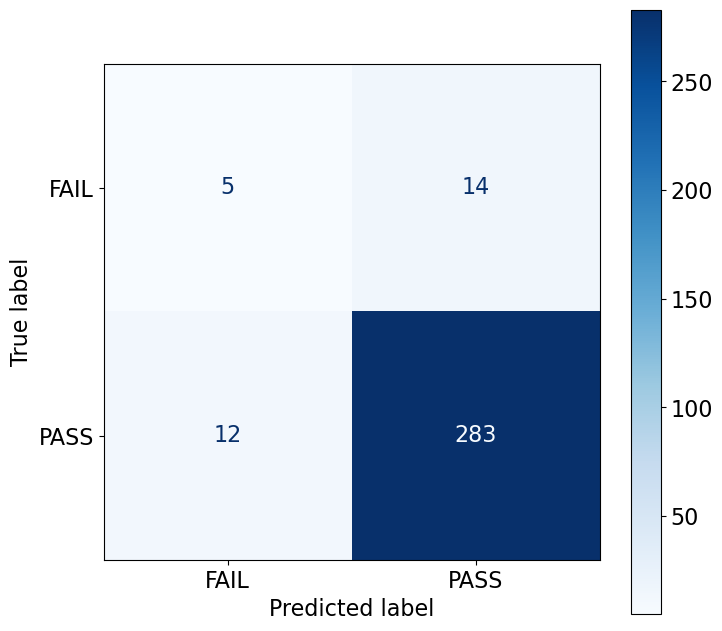

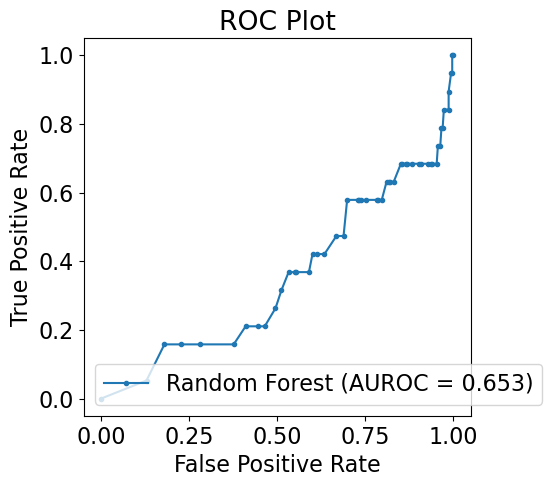

In [136]:
# Random Forest model
run_ML_process(X_train, y_train, X_test, y_test, RandomForestClassifier())